**Análisis descriptivo de las inscripciones al componente de Deportes del Índer Envigado entre las vigencias 2018 y 2025**

In [252]:
!pip install squarify # Instalar el paquete squarify

In [253]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy # Modelos estadisticos
import statsmodels as sm # Modelos estadisticos
import squarify
import random




In [254]:
# Definir la ruta del archivo de Excel
file_INSCRITOSIE = 'https://raw.githubusercontent.com/InderEnvigado/Datos_Inder_Envigado_inscripciones/main/Informe_inscritos_proyecto.xlsx'

**Exploración de Datos**

In [255]:
# Leer el archivo de Excel y cargarlo en un DataFrame
INSCRITOSIE = pd.read_excel(file_INSCRITOSIE)

In [256]:
# Verificar los nombres de las columnas
print("\nNombres de las columnas:")
print(INSCRITOSIE.columns)


Nombres de las columnas:
Index(['fecha', 'Inscripcion', 'Servicio', 'Nivel', 'nom_barrio', 'edad',
       'Género', 'etnia', 'Poblacion', 'Escenario', 'instructor', 'zona',
       'fecha_nacimiento', 'estrato', 'cod_ciu', 'diversidad'],
      dtype='object')


In [257]:
from tabulate import tabulate  # Asegúrate de instalar esta librería con: pip install tabulate

# Mostrar las primeras filas del DataFrame en forma de tabla
print("\nPrimeras filas del DataFrame:")
print(tabulate(INSCRITOSIE.head(), headers='keys', tablefmt='grid'))

# Mostrar las últimas filas del DataFrame en forma de tabla
print("\nÚltimos registros del DataFrame:")
print(tabulate(INSCRITOSIE.tail(), headers='keys', tablefmt='grid'))


Primeras filas del DataFrame:
+----+---------------------+---------------+-------------------+--------------------------+--------------+--------+-----------+---------+---------------------------+------------------------------------------+-------------------------------+-----------+---------------------+-----------+-----------+--------------+
|    | fecha               |   Inscripcion | Servicio          | Nivel                    | nom_barrio   |   edad | Género    | etnia   | Poblacion                 | Escenario                                | instructor                    | zona      | fecha_nacimiento    |   estrato | cod_ciu   | diversidad   |
+====+=====================+===============+===================+==========================+==============+========+===========+=========+===========================+==========================================+===============================+===========+=====================+===========+===========+==============+
|  0 | 2018-01-17 00:00:00 

In [258]:
# Cuantas filas y columnas tiene nuestro dataframe
INSCRITOSIE.shape

(45671, 16)

In [259]:
#consultar el tipo de datos
print(INSCRITOSIE.dtypes)

fecha               datetime64[ns]
Inscripcion                  int64
Servicio                    object
Nivel                       object
nom_barrio                  object
edad                         int64
Género                      object
etnia                       object
Poblacion                   object
Escenario                   object
instructor                  object
zona                        object
fecha_nacimiento    datetime64[ns]
estrato                     object
cod_ciu                     object
diversidad                  object
dtype: object


In [260]:
# Información general del DataFrame
print("\nInformación general del DataFrame:")
print(INSCRITOSIE.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45671 entries, 0 to 45670
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             45671 non-null  datetime64[ns]
 1   Inscripcion       45671 non-null  int64         
 2   Servicio          45671 non-null  object        
 3   Nivel             45671 non-null  object        
 4   nom_barrio        34984 non-null  object        
 5   edad              45671 non-null  int64         
 6   Género            45671 non-null  object        
 7   etnia             36475 non-null  object        
 8   Poblacion         36431 non-null  object        
 9   Escenario         45671 non-null  object        
 10  instructor        45671 non-null  object        
 11  zona              31855 non-null  object        
 12  fecha_nacimiento  42996 non-null  datetime64[ns]
 13  estrato           35677 non-null  object

In [261]:
# Valores únicos
print("\nCantidad de valores únicos en cada columna:")
print(INSCRITOSIE.nunique())


Cantidad de valores únicos en cada columna:
fecha                1398
Inscripcion         43073
Servicio               32
Nivel                 379
nom_barrio             47
edad                   84
Género                  5
etnia                  14
Poblacion               9
Escenario              47
instructor            129
zona                   39
fecha_nacimiento     7468
estrato                 8
cod_ciu                23
diversidad             10
dtype: int64


In [262]:
# Identificar y validar valores nulos
print("\nValidación de valores nulos:")
print(INSCRITOSIE.isnull().sum())



Validación de valores nulos:
fecha                   0
Inscripcion             0
Servicio                0
Nivel                   0
nom_barrio          10687
edad                    0
Género                  0
etnia                9196
Poblacion            9240
Escenario               0
instructor              0
zona                13816
fecha_nacimiento     2675
estrato              9994
cod_ciu             10544
diversidad            541
dtype: int64


In [263]:
# Calculamos el porcentaje de valores nulos en cada columna para identificar columnas críticas
porcentaje_nulos = round((INSCRITOSIE.isnull().sum() / len(INSCRITOSIE)) * 100, 2) # Dividimos el total de valores nulos entre el total de datos
print(porcentaje_nulos.sort_values(ascending=False))  # Ordenamos de mayor a menor para visualizar las columnas con más nulos

zona                30.25
nom_barrio          23.40
cod_ciu             23.09
estrato             21.88
Poblacion           20.23
etnia               20.14
fecha_nacimiento     5.86
diversidad           1.18
Género               0.00
edad                 0.00
Servicio             0.00
Nivel                0.00
Inscripcion          0.00
fecha                0.00
instructor           0.00
Escenario            0.00
dtype: float64


In [264]:
## Esta opción te mostrará los valores únicos junto con su frecuencia, ordenados de mayor a menor, por servicio:
## Usar prettytable para una visualización tabular
from prettytable import PrettyTable

# Contar los valores únicos y ordenarlos
disciplina_counts = INSCRITOSIE['Servicio'].value_counts().sort_values(ascending=False)

# Crear una tabla
table = PrettyTable()
table.field_names = ["Servicio", "Frecuencia"]

# Agregar los valores únicos a la tabla
for disciplina, frecuencia in disciplina_counts.items():
    table.add_row([disciplina, frecuencia])

# Imprimir la tabla
print(table)

+----------------------------------------------------+------------+
|                      Servicio                      | Frecuencia |
+----------------------------------------------------+------------+
|                      NATACIÓN                      |    8510    |
| TENIS DE CAMPO                                     |    6719    |
|                 GIMNASIA INFANTIL                  |    5016    |
| ACTIVIDADES ACUATICAS - ALTO DE LOS SUEÑOS         |    4741    |
| VOLEIBOL Y VOLEY PLAYA                             |    4145    |
|                NATACIÓN LAS COMETAS                |    3171    |
| TAEKWONDO                                          |    2723    |
| TENIS DE CAMPO - ALTO DE LOS SUEÑOS                |    2102    |
| BALONCESTO                                         |    1885    |
| ATLETISMO                                          |    1018    |
| NATACIÓN PALMAS                                    |    958     |
| SÓFTBOL                                       

In [265]:
import pandas as pd

# Suponiendo que ya tienes el DataFrame INSCRITOSIE
valores_unicos = INSCRITOSIE['zona'].unique()

# Convertir todos los elementos a cadenas antes de ordenar
valores_unicos_ordenados = sorted([str(x) for x in valores_unicos], reverse=True)

# Crear un DataFrame para mostrar los valores de manera organizada
df_valores_unicos = pd.DataFrame(valores_unicos_ordenados, columns=['Zonas'])

# Mostrar el DataFrame
print(df_valores_unicos)

                                                Zonas
0                                                 nan
1   ZONA 9                                        ...
2                                              ZONA 9
3   ZONA 8                                        ...
4                                              ZONA 8
5   ZONA 7                                        ...
6                                              ZONA 7
7   ZONA 6                                        ...
8                                              ZONA 6
9   ZONA 5                                        ...
10                                             ZONA 5
11  ZONA 4                                        ...
12                                             ZONA 4
13  ZONA 3                                        ...
14                                             ZONA 3
15  ZONA 2                                        ...
16                                             ZONA 2
17                          

In [266]:
#Verificar los valores únicos en los barrios
INSCRITOSIE['nom_barrio'].unique()

array([nan, 'NO APLICA                               ',
       'OTRO                                    ',
       'EL DORADO                               ',
       'ALCALÁ                                  ',
       'VEREDA PANTANILLO                       ',
       'EL ESMERALDAL                           ',
       'MILÁN - VALLEJUELOS                     ',
       'LOMA DE LAS BRUJAS                      ',
       'JARDINES                                ',
       'LOS NARANJOS                            ',
       'LA MAGNOLIA                             ',
       'LA MINA                                 ',
       'EL SALADO                               ',
       'MESA                             ',
       'PONTEVEDRA                              ',
       'LOMA DEL BARRO                          ',
       'EL TRIANÓN                              ',
       'EL CHINGUÍ                              ',
       'SAN JOSÉ                                ',
       'LAS ANTILLAS             

In [267]:
#Verificar los valores únicos de las edad
INSCRITOSIE['edad'].unique()

array([ 15,   9,  20,  22,  12,   0,  19,  16,  21,  11,  10,  17,  18,
        54,  50,  13,  24,  14,  42,  38,   8,  28,  35,  40,  52,  41,
        36,  71,  60,   1,  32,  33,  34,  31,  53,  43,  25,  23,  45,
        69,  61,  48,  39,  44,  47,  27,  63,  37,  30,  49,  26,   7,
        57,  51,  56,   6,  29,  62,  59,  55,  46,   4,  75,  64,  70,
        58,  68,  73,  67,  76,  65,  66,  80,  74,   5,   3,  72,  78,
        79, -75, 125,   2,  83,  84])

In [268]:
#Verificar los valores únicos de las etnias
INSCRITOSIE['etnia'].unique()

array([nan, 'Mestiza                                           ',
       'Otro                                              ', 'No aplica',
       'Blanco                                            ',
       'No se autorreconoce', 'Rom', 'Afrocolombiana                ',
       'Indígena                                          ',
       'No desea informar',
       'No registra                                       ',
       'Raizal                                            ',
       'Mulato                                            ', 'Negra',
       'Palenquera                             '], dtype=object)

In [269]:
#Verificar los valores únicos en la diversidad
INSCRITOSIE['diversidad'].unique()

array(['No Aplica', 'Heterosexual', 'No se identifica',
       'No desea informar',
       'Bisexual                                          ',
       'Lesbiana                                          ',
       'Gay                                               ', nan,
       'Trans                                             ',
       'Inter                                             ',
       'Queer                                             '], dtype=object)

In [270]:
#Verificar los valores únicos de la Poblacion
INSCRITOSIE['Poblacion'].unique()

array([nan, 'No Aplica',
       'Ninguna de las anteriores                         ',
       'Sin registrar',
       'Persona en condición de discapacidad             ',
       'Víctima del conflicto armado                      ',
       'Desplazado                                        ',
       'LGTBIQ+                                           ', 'Campesino',
       'Migrante'], dtype=object)

Limpieza de Datos

In [271]:
# Renombrar columnas

INSCRITOSIE.rename(columns={'fecha': 'Fecha Inscripción'}, inplace=True)
INSCRITOSIE.rename(columns={'Inscripcion': 'Nro Inscripción'}, inplace=True)
INSCRITOSIE.rename(columns={'Servicio': 'Disciplina'}, inplace=True)
INSCRITOSIE.rename(columns={'nom_barrio': 'Nombre Barrio'}, inplace=True)
INSCRITOSIE.rename(columns={'edad': 'Edad'}, inplace=True)
INSCRITOSIE.rename(columns={'etnia': 'Etnia'}, inplace=True)
INSCRITOSIE.rename(columns={'instructor': 'Instructor'}, inplace=True)
INSCRITOSIE.rename(columns={'zona': 'Zona'}, inplace=True)
INSCRITOSIE.rename(columns={'fecha_nacimiento': 'Fecha Nacimiento'}, inplace=True)
INSCRITOSIE.rename(columns={'estrato': 'Estrato'}, inplace=True)
INSCRITOSIE.rename(columns={'cod_ciu': 'Ciudad'}, inplace=True)
INSCRITOSIE.rename(columns={'diversidad': 'Diversidad'}, inplace=True)


In [272]:
## transformar el tipo de dato en algunas columnas.

INSCRITOSIE = INSCRITOSIE.astype({'Nro Inscripción': 'int32'})

INSCRITOSIE = INSCRITOSIE.astype({'Disciplina': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Nivel': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Nombre Barrio': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Edad': 'int32'})

INSCRITOSIE = INSCRITOSIE.astype({'Género': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Etnia': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Poblacion': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Escenario': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Instructor': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Zona': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Estrato': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Ciudad': 'category'})

INSCRITOSIE = INSCRITOSIE.astype({'Diversidad': 'category'})

In [273]:
# Asegúrate de que 'Nombre Barrio' sea de tipo categórico
INSCRITOSIE['Nombre Barrio'] = INSCRITOSIE['Nombre Barrio'].astype('category')

# Verificar si la categoría 'No registra' ya existe antes de agregarla
if 'No registra' not in INSCRITOSIE['Nombre Barrio'].cat.categories:
    INSCRITOSIE['Nombre Barrio'] = INSCRITOSIE['Nombre Barrio'].cat.add_categories(['No registra'])

# Reemplazar valores nulos (NaN) por "No registra"
INSCRITOSIE['Nombre Barrio'] = INSCRITOSIE['Nombre Barrio'].fillna("No registra")

# Reemplazar la cadena 'NULL' por "No registra"
INSCRITOSIE['Nombre Barrio'] = INSCRITOSIE['Nombre Barrio'].replace({'NULL': 'No registra'})

In [274]:
# Reemplazar la edad menor o igual a cero por 0
INSCRITOSIE.loc[INSCRITOSIE['Edad'] < 0, 'Edad'] = 0

# Reemplazar la edad mayor a 100 años por 0
INSCRITOSIE.loc[INSCRITOSIE['Edad'] > 100, 'Edad'] = 0

# Verificar el resultado
print(INSCRITOSIE['Edad'].describe())

count    45671.000000
mean        16.550787
std         12.113698
min          0.000000
25%         10.000000
50%         14.000000
75%         19.000000
max         84.000000
Name: Edad, dtype: float64


In [275]:
# Asegúrate de que 'Etnia' sea de tipo categórico
INSCRITOSIE['Etnia'] = INSCRITOSIE['Etnia'].astype('category')

# Agregar 'No registra' a las categorías si no existe
if "No registra" not in INSCRITOSIE["Etnia"].cat.categories:
    INSCRITOSIE["Etnia"] = INSCRITOSIE["Etnia"].cat.add_categories(["No registra"])

# Reemplazar valores nulos (NaN) por "No registra" en la columna 'Etnia'
INSCRITOSIE['Etnia'] = INSCRITOSIE['Etnia'].fillna("No registra")

# Reemplazar la cadena 'NULL' por "No registra" en la columna 'Etnia'
INSCRITOSIE['Etnia'] = INSCRITOSIE['Etnia'].replace({'NULL': 'No registra'})

In [276]:
# Asegúrate de que 'Poblacion' sea de tipo categórico
INSCRITOSIE['Poblacion'] = INSCRITOSIE['Poblacion'].astype('category')

# Agregar 'No registra' a las categorías si no existe
if "No registra" not in INSCRITOSIE["Poblacion"].cat.categories:
    INSCRITOSIE["Poblacion"] = INSCRITOSIE["Poblacion"].cat.add_categories(["No registra"])

# Reemplazar valores nulos (NaN) por "No registra" en la columna 'Poblacion'
INSCRITOSIE['Poblacion'] = INSCRITOSIE['Poblacion'].fillna("No registra")

# Reemplazar la cadena 'NULL' por "No registra" en la columna 'Poblacion'
INSCRITOSIE['Poblacion'] = INSCRITOSIE['Poblacion'].replace({'NULL': 'No registra'})

In [277]:
# Reemplazar valores nulos (NaN) por "No registra" en la columna 'Zona'
# Agregar 'No registra' a las categorías si no existe
if "No registra" not in INSCRITOSIE["Zona"].cat.categories:
    INSCRITOSIE["Zona"] = INSCRITOSIE["Zona"].cat.add_categories(["No registra"])

# Instead of inplace=True, reassign:
INSCRITOSIE["Zona"] = INSCRITOSIE["Zona"].fillna("No registra")

# Reemplazar la cadena 'NULL' por "No registra" en la columna 'Zona'
# (previously it was incorrectly targeting 'Etnia')
# Instead of inplace=True, reassign:
INSCRITOSIE["Zona"] = INSCRITOSIE["Zona"].replace({'NULL': 'No registra'})

In [278]:
# Reemplazar valores nulos (NaN) por una fecha específica en 'Fecha Nacimiento'
fecha_especifica = pd.to_datetime('1900-01-01')  # O cualquier otra fecha válida

# Reemplazar valores nulos (NaN) por la fecha específica
INSCRITOSIE['Fecha Nacimiento'] = INSCRITOSIE['Fecha Nacimiento'].fillna(fecha_especifica)

# Reemplazar la cadena 'NULL' por la fecha específica en 'Fecha Nacimiento'
INSCRITOSIE['Fecha Nacimiento'] = INSCRITOSIE['Fecha Nacimiento'].replace({'NULL': fecha_especifica})

In [279]:
# Reemplazar valores nulos (NaN) por un número específico en 'Estrato'
numero_especifico = 0  # Define el número específico que quieres utilizar
INSCRITOSIE['Estrato'] = INSCRITOSIE['Estrato'].fillna(numero_especifico)

# Reemplazar la cadena 'NULL' por el número específico en 'Estrato'
INSCRITOSIE['Estrato'] = INSCRITOSIE['Estrato'].replace({'NULL': numero_especifico})


In [280]:
# Reemplazar valores nulos (NaN) por "No registra" en la columna 'Ciudad'
# Agregar 'No registra' a las categorías si no existe
if "No registra" not in INSCRITOSIE["Ciudad"].cat.categories:
    INSCRITOSIE["Ciudad"] = INSCRITOSIE["Ciudad"].cat.add_categories(["No registra"])

# Instead of inplace=True, reassign:
INSCRITOSIE["Ciudad"] = INSCRITOSIE["Ciudad"].fillna("No registra")

# Reemplazar la cadena 'NULL' por "No registra" en la columna 'Ciudad'
# Instead of inplace=True, reassign:
INSCRITOSIE["Ciudad"] = INSCRITOSIE["Ciudad"].replace({'NULL': 'No registra'})

In [281]:
# Reemplazar valores nulos (NaN) por "No registra" en la columna 'Diversidad'
# Agregar 'No registra' a las categorías si no existe
if "No registra" not in INSCRITOSIE["Diversidad"].cat.categories:
    INSCRITOSIE["Diversidad"] = INSCRITOSIE["Diversidad"].cat.add_categories(["No registra"])

# Instead of inplace=True, reassign:
INSCRITOSIE["Diversidad"] = INSCRITOSIE["Diversidad"].fillna("No registra")

# Reemplazar la cadena 'NULL' por "No registra" en la columna 'Diversidad'
# Instead of inplace=True, reassign:
INSCRITOSIE["Diversidad"] = INSCRITOSIE["Diversidad"].replace({'NULL': 'No registra'})

In [282]:
# Identificar y validar valores nulos
print("\nValidación de valores nulos:")
print(INSCRITOSIE.isnull().sum())


Validación de valores nulos:
Fecha Inscripción    0
Nro Inscripción      0
Disciplina           0
Nivel                0
Nombre Barrio        0
Edad                 0
Género               0
Etnia                0
Poblacion            0
Escenario            0
Instructor           0
Zona                 0
Fecha Nacimiento     0
Estrato              0
Ciudad               0
Diversidad           0
dtype: int64


In [283]:
# Asegúrate de que 'Zona' sea de tipo categórico
INSCRITOSIE['Zona'] = INSCRITOSIE['Zona'].astype('category')

# Crear un diccionario de reemplazo
reemplazos_zona = {
    0: 'No Aplica',
    1: 'Zona 1',
    2: 'Zona 2',
    3: 'Zona 3',
    4: 'Zona 4',
    5: 'Zona 5',
    6: 'Zona 6',
    7: 'Zona 7',
    8: 'Zona 8',
    9: 'Zona 9',
    10: 'Zona 10',
    11: 'Zona 11',
    12: 'Zona 12',
    13: 'Zona 13',
}

# Renombrar las categorías usando rename_categories
INSCRITOSIE['Zona'] = INSCRITOSIE['Zona'].cat.rename_categories(
    [reemplazos_zona.get(i, i) for i in INSCRITOSIE['Zona'].cat.categories]
)

# Agregar 'No Registra' a las categorías si no existe
if 'No Registra' not in INSCRITOSIE['Zona'].cat.categories:
    INSCRITOSIE['Zona'] = INSCRITOSIE['Zona'].cat.add_categories(['No Registra'])

# Reemplazar NaN con 'No Registra'
INSCRITOSIE['Zona'] = INSCRITOSIE['Zona'].fillna('No Registra')


In [284]:
# Limpiamos columnas de texto eliminando espacios innecesarios y convertimos primeras letras de una palabra a mayúsculas
def limpiar_texto(texto):
    if isinstance(texto, str):  # Verificamos que el valor sea string
        return ' '.join(texto.strip().title().split())  # Elimina espacios innecesarios y convierte el formato
    return texto  # Si no es texto, se devuelve el valor original sin cambios

# Lista de columnas de texto que se van a limpiar
columnas_texto = ['Disciplina', 'Nivel', 'Nombre Barrio',
                  'Género', 'Etnia', 'Poblacion', 'Escenario',
                  'Instructor', 'Zona', 'Ciudad', 'Diversidad']

# Aplicación de la función de limpieza a las columnas de texto usando str
for col in columnas_texto:
    INSCRITOSIE[col] = INSCRITOSIE[col].str.strip().str.title().str.replace(r'\s+', ' ', regex=True)

# Si deseas aplicar la función personalizada, puedes hacerlo así:
# INSCRITOSIE[columnas_texto] = INSCRITOSIE[columnas_texto].applymap(limpiar_texto)

In [285]:
# Convertir la columna 'Disciplina' a texto en mayúsculas
INSCRITOSIE['Disciplina'] = INSCRITOSIE['Disciplina'].str.upper()

Análisis Descriptivo

In [286]:
# Si deseas usar la librería skimpy para estadísticas descriptivas de variables categóricas
!pip install skimpy
from skimpy import skim
skim(INSCRITOSIE)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 45671  │ │ string      │ 11    │ │ Estrato               │                                │
│ │ Number of columns │ 16     │ │ datetime64  │ 2     │ └───────────────────────┘                                │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                │ category    │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %  ┃ mean   ┃ sd      ┃ p0   ┃ p25    ┃ p50    ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Nro Inscripción    │   0 │     0 │  66880 │  285300 │  198 │  26910 │  62820 │  95220 │  20180000 │   █    │  │
│ │ Edad               │   0 │     0 │  16.55 │   12.11 │    0 │     10 │     14 │     19 │        84 │  █▆▁▁  │  │
│ └────────────────────┴─────┴───────┴────────┴─────────┴──────┴────────┴────────┴────────┴───────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                   ┃ NA         ┃ NA %             ┃ ordered                  ┃ unique               ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Estrato                  │          0 │                0 │ False                    │                    8 │  │
│ └──────────────────────────┴────────────┴──────────────────┴──────────────────────────┴──────────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                        ┃ NA    ┃ NA %     ┃ first             ┃ last              ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha Inscripción             │     0 │        0 │    2018-01-17     │    2025-04-04     │ None            │  │
│ │ Fecha Nacimiento              │     0 │        0 │    1900-01-01     │    2099-09-10     │ None            │  │
│ └───────────────────────────────┴───────┴──────────┴───────────────────┴───────────────────┴─────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━

In [287]:
## Edad promedio de inscritos en la base de datos
INSCRITOSIE['Edad'].mean()

np.float64(16.550787151584156)

In [288]:
## Desviación estándar de la base de datos
## Indica que tan dispersos alrededor de la media estan los datos
INSCRITOSIE['Edad'].std()

12.113697510631361

In [289]:
## Varianza de la base de datos
INSCRITOSIE['Edad'].var()

146.74166737907643

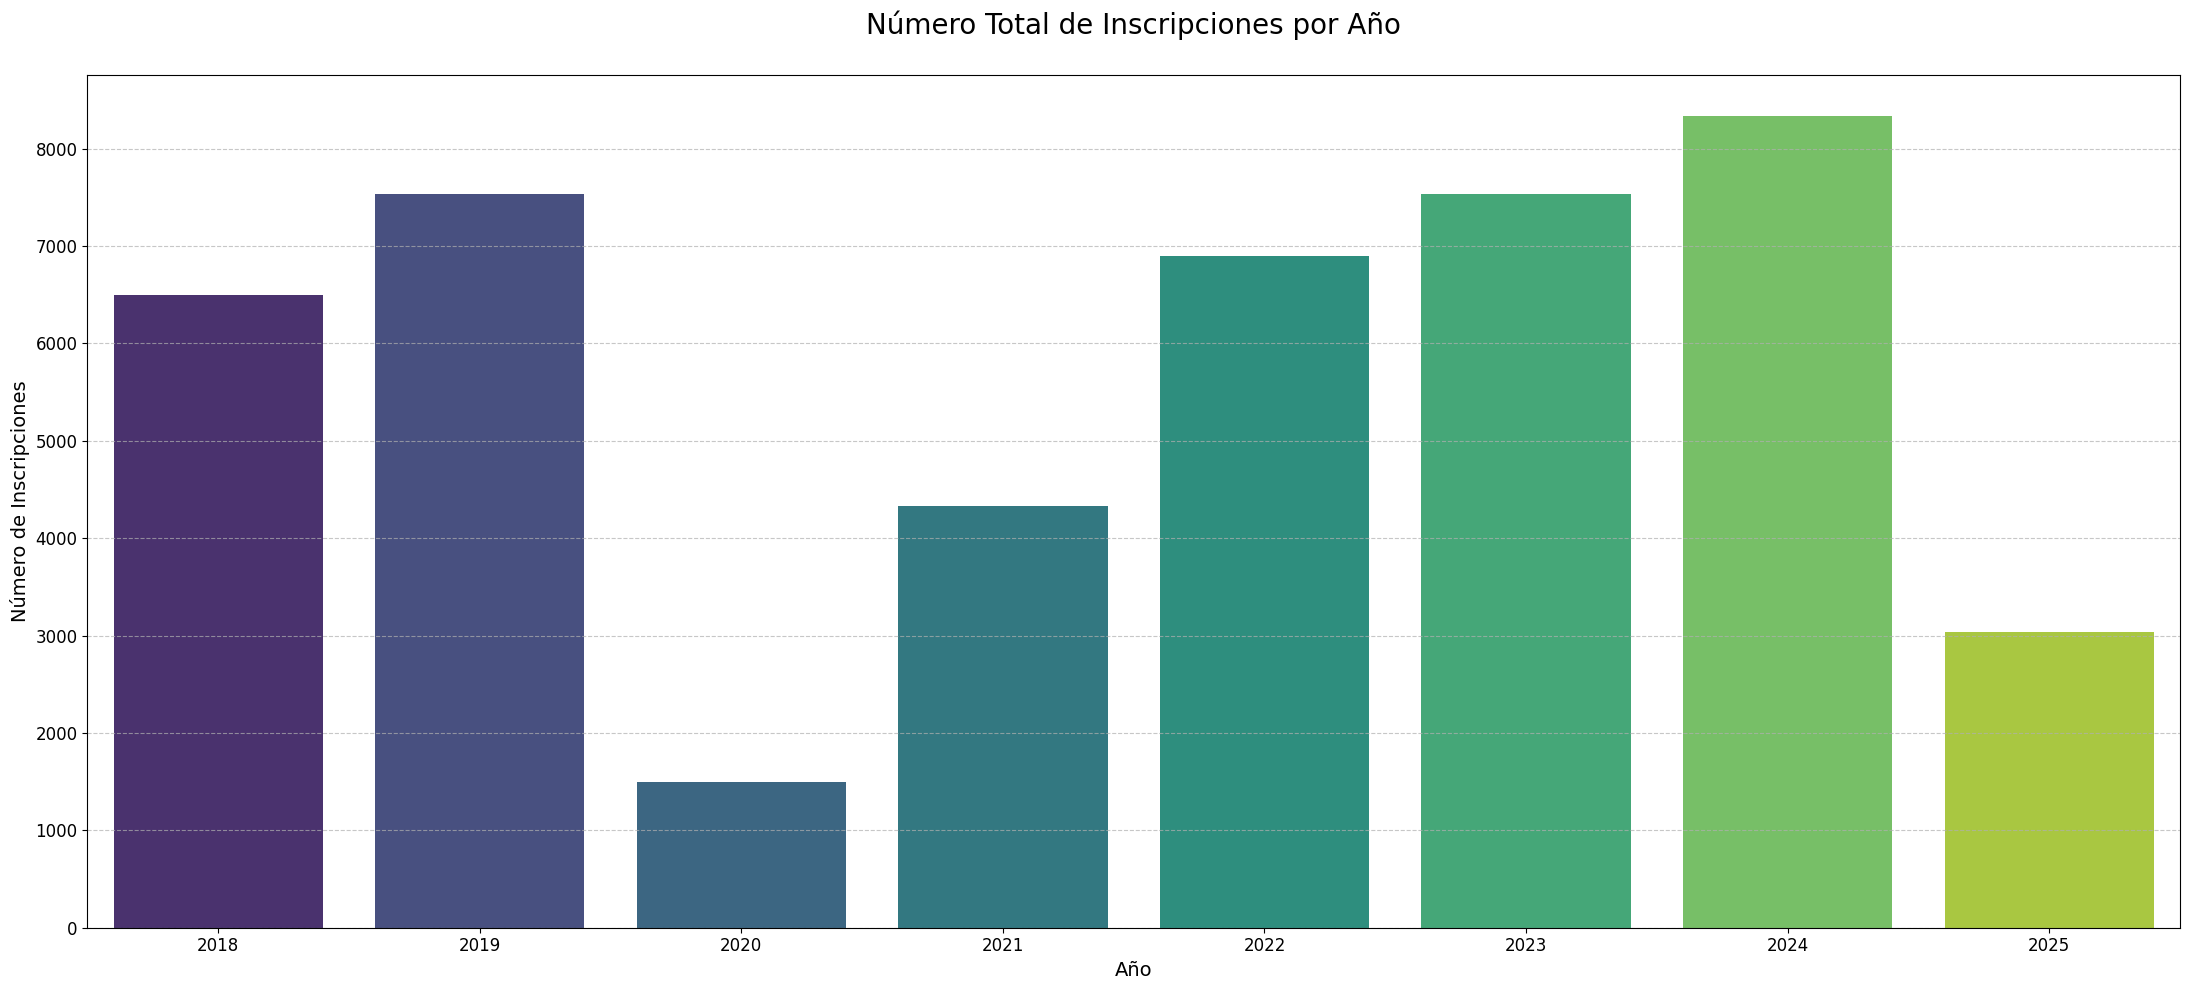

In [290]:
# Asegurar que la columna 'Fecha Inscripción' sea de tipo datetime
INSCRITOSIE['Fecha Inscripción'] = pd.to_datetime(INSCRITOSIE['Fecha Inscripción'], errors='coerce')

# Extraer el año de la fecha de inscripción
INSCRITOSIE['Año'] = INSCRITOSIE['Fecha Inscripción'].dt.year

# --- Análisis: Inscripciones Totales por Año ---
# Contar inscripciones por año
inscripciones_por_año = INSCRITOSIE.groupby('Año')['Nro Inscripción'].count().reset_index()
inscripciones_por_año.columns = ['Año', 'Número de Inscripciones']

# --- Análisis: Inscripciones por Año y Disciplina ---
# Contar inscripciones por año y disciplina
inscripciones_por_año_disciplina = INSCRITOSIE.groupby(['Año', 'Disciplina'])['Nro Inscripción'].count().reset_index(name='Número de Inscripciones')

# --- Visualización: Gráfico 1 - Número Total de Inscripciones por Año ---
plt.figure(figsize=(22, 10))  # Crear una nueva figura
sns.barplot(data=inscripciones_por_año, x='Año', y='Número de Inscripciones', palette='viridis')
plt.title('Número Total de Inscripciones por Año', fontsize=20, pad=30)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Inscripciones', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



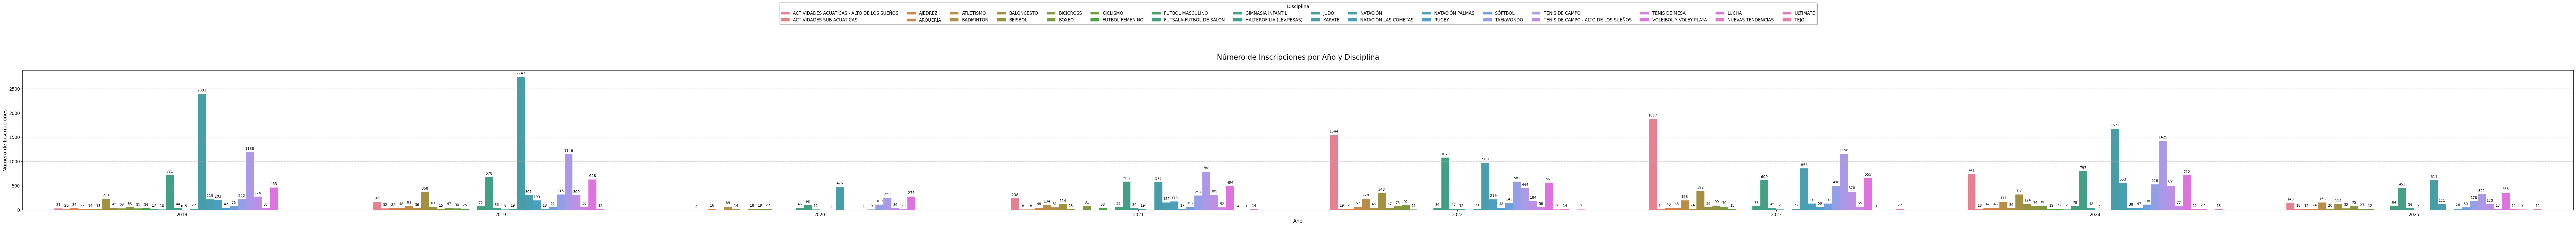

In [291]:
# Crear otra nueva figura con un tamaño más amplio horizontalmente
plt.figure(figsize=(100, 10))  # Aumentar el ancho a 60 y mantener la altura en 20

# Definir una paleta de colores más contrastante
palette = sns.color_palette("husl", n_colors=len(inscripciones_por_año_disciplina['Disciplina'].unique()))

# Crear el gráfico de barras
bar_plot = sns.barplot(data=inscripciones_por_año_disciplina, x='Año', y='Número de Inscripciones', hue='Disciplina', palette=palette)

# Añadir etiquetas de los valores en las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black',
                      rotation=0, xytext=(0, 5), textcoords='offset points')

plt.title('Número de Inscripciones por Año y Disciplina', fontsize=20, pad=30)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Inscripciones', fontsize=14)

# Ajustar la posición de la leyenda para que sea horizontal
plt.legend(
    title='Disciplina',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.50),
    ncol=16,  # Cambiar a 10 columnas para más espacio
    fontsize=12,
    title_fontsize='13',
    borderaxespad=0.5,
    frameon=True,
    shadow=True,
    fancybox=True
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [292]:
# Agrupar los datos por 'Disciplina' y 'Género'
data = INSCRITOSIE.groupby(['Disciplina', 'Género']).size().reset_index(name='Cantidad')

# Verificar si hay valores nulos en 'Disciplina' o 'Género'
if data['Disciplina'].isnull().any() or data['Género'].isnull().any():
    print("Advertencia: Hay valores nulos en 'Disciplina' o 'Género'.")

# Crear el gráfico de rayos solares con un tamaño más grande
fig = px.sunburst(data, path=['Disciplina', 'Género'], values='Cantidad',
                  title='Distribución de Disciplina y Género',
                  width=1000,  # Ajustar el ancho del gráfico
                  height=1000)  # Ajustar la altura del gráfico

# Mostrar el gráfico
fig.show()

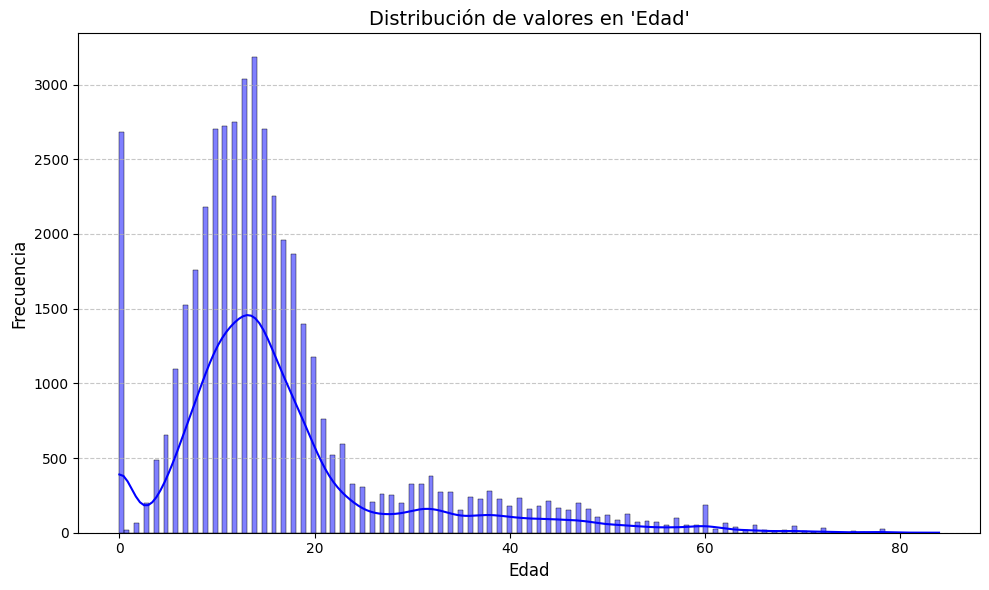

In [293]:
# Asegúrate de que la columna 'Edad' existe en el DataFrame
if 'Edad' in INSCRITOSIE.columns:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
    sns.histplot(INSCRITOSIE['Edad'], kde=True, color='blue')  # Histograma con KDE
    plt.title("Distribución de valores en 'Edad'", fontsize=14)
    plt.xlabel('Edad', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
    plt.show()  # Mostrar la figura
else:
    print("La columna 'Edad' no se encuentra en el DataFrame.")

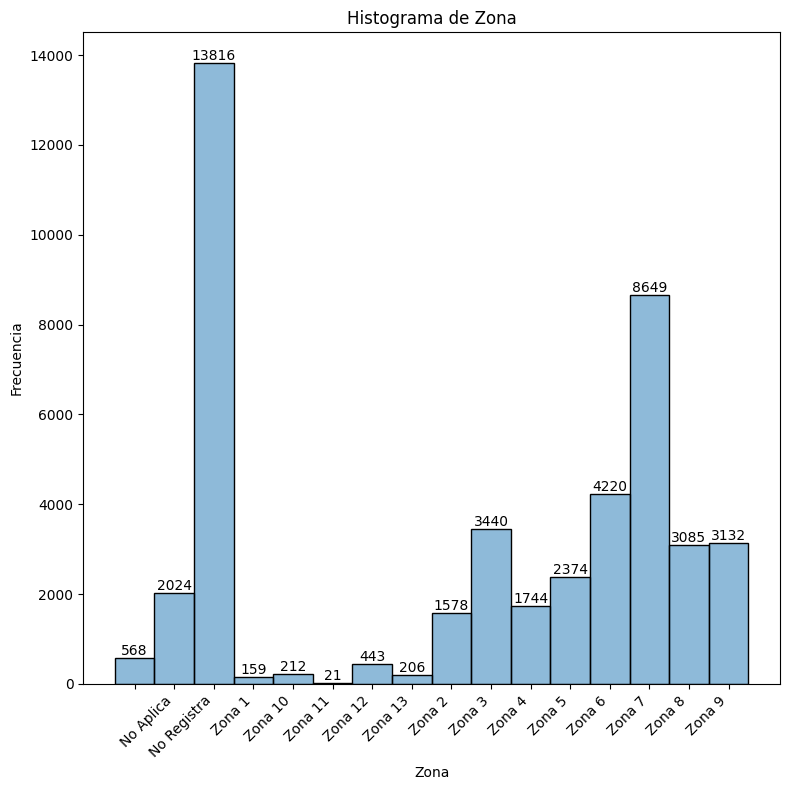

In [294]:
# Supongamos que INSCRITOSIE es tu DataFrame
# Verificar y convertir la columna 'Zona' al tipo categórico si aún no lo es
if not isinstance(INSCRITOSIE['Zona'].dtype, pd.CategoricalDtype):
    INSCRITOSIE['Zona'] = INSCRITOSIE['Zona'].astype('category')

# Asegúrese de que 'Disciplina' también sea categórica
if not isinstance(INSCRITOSIE['Disciplina'].dtype, pd.CategoricalDtype):
    INSCRITOSIE['Disciplina'] = INSCRITOSIE['Disciplina'].astype('category')

# Eliminar filas con valores nulos en 'Zona' o 'Disciplina'
INSCRITOSIE = INSCRITOSIE.dropna(subset=['Zona', 'Disciplina'])

# 1. Ordene el DataFrame por 'Zona' en el orden deseado
zona_order = INSCRITOSIE['Zona'].cat.categories.tolist()  # Obtener nombres únicos de zonas como una lista
zona_order.sort()  # Ordenar nombres de zonas alfabéticamente (o como se desee)

# Crear un mapeo para ordenar
zona_mapping = {zone: i for i, zone in enumerate(zona_order)}

# Ordene el DataFrame usando el mapeo
INSCRITOSIE_sorted = INSCRITOSIE.sort_values(by='Zona', key=lambda x: x.map(zona_mapping))

# 2. Crea el histograma con disciplinas coloreadas por zona
plt.figure(figsize=(8, 8))
hist_plot = sns.histplot(
    data=INSCRITOSIE_sorted,
    x='Zona',  # Utilice la columna 'Zona' para el eje x
    bins=len(zona_order),  # Establezca contenedores en el número de zonas únicas
    alpha=0.5,
    multiple='stack'  # Apila las barras para una mejor visualización
)

# Asignar etiquetas a los ejes y título
plt.xticks(rotation=45, ha='right')  # Gire las etiquetas del eje x para una mejor legibilidad
plt.xlabel('Zona')  # Etiqueta para el eje x
plt.ylabel('Frecuencia')  # Etiqueta para el eje y
plt.title('Histograma de Zona')  # Título para la trama

#Eliminar la sección de etiquetas
#The for loop was incorrectly indented. It should be aligned with the previous lines of code within the same block
for p in hist_plot.patches:
    height = p.get_height()
    if height > 0:  # Solo agregar etiquetas a las barras que tienen altura
        hist_plot.annotate(
            f'{int(height)}',  # Texto de la etiqueta
            (p.get_x() + p.get_width() / 2., height + 0.5),  # Posición de la etiqueta (desplazada hacia arriba)
            ha='center', va='bottom'  # Alinear el texto
        )

plt.tight_layout()  # Ajustar el diseño para evitar el recorte de las etiquetas de verificación
plt.show()

In [300]:
# Agrupar los datos por 'Poblacion' y 'Disciplina'
data = INSCRITOSIE.groupby(['Poblacion', 'Disciplina']).size().reset_index(name='Cantidad')

# Verificar si hay valores nulos en 'Poblacion' o 'Disciplina'
if data['Poblacion'].isnull().any() or data['Disciplina'].isnull().any():
    print("Advertencia: Hay valores nulos en 'Poblacion' o 'Disciplina'.")


# Crear el gráfico de rayos solares con un tamaño más grande
fig = px.sunburst(data, path=['Poblacion', 'Disciplina'], values='Cantidad',
                  title='Distribución de Poblacion y Disciplina',
                  width=1000,  # Ajustar el ancho del gráfico
                  height=1000)  # Ajustar la altura del gráfico

# Mostrar el gráfico
fig.show()